In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import numpy as np
# import tensorflow_transform as tft
# print(tf.__version__)
# !pip install tensorflow-transform
# %cd /content/gdrive/My Drive/github_project/posts/HowToDoDeepLearningOnGraphsWithGraphConvolutionalNetworks/Part2_SemiSupervisedLearningWithSpectralGraphConvolutions/


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10


#训练邻接矩阵 a
tmp = order[0]
A = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_all_150_' + str(tmp)+ '.npy')
A = np.reshape(A,(150,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_all_150_' + str(i)+ '.npy')
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)

a = A
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)

#训练强度 b
tmp = order[0]
B = np.load('/content/gdrive/My Drive/strength/flipped/keep_30/three/' + str(tmp)+ '.npy')
B = np.reshape(B,(150,30,116,1))
for i in order[1:18]: 
  b = np.load('/content/gdrive/My Drive/strength/flipped/keep_30/three/' + str(i)+ '.npy')
  b = np.reshape(b,(150,30,116,1))
  B = np.concatenate((B,b), axis = 0)
b = B
print(B.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,1)

#训练输出label c 
tmp = order[0]
C = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(tmp)+ '.npy')
for i in order[1:18]: 
  c = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i)+ '.npy')
  C = np.concatenate((C,c), axis = 0)
c = C
print(C.shape)
# 前十八个 病人数据做训练label(2700, 2)


#测试邻接矩阵 f
tmp = order[18]
F = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_all_150_' + str(tmp)+ '.npy')
F = np.reshape(F,(150,30,116,116))
for i in order[19:]: 
  f = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/flipped_all_150_' + str(i)+ '.npy')
  f = np.reshape(f,(150,30,116,116))
  F = np.concatenate((F,f), axis = 0)
f = F
print(F.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

# 测试强度 d
tmp = order[18]
D = np.load('/content/gdrive/My Drive/strength/flipped/keep_30/three/' + str(tmp)+ '.npy')
D = np.reshape(D,(150,30,116,1))
for i in order[19:]: 
  d = np.load('/content/gdrive/My Drive/strength/flipped/keep_30/three/' + str(i)+ '.npy')
  d = np.reshape(d,(150,30,116,1))
  D = np.concatenate((D,d), axis = 0)
d = D
print(D.shape)
# 后六个人 病人数据做测试label(900, 30, 116,,1)

#测试输出label  e
tmp = order[18]
E = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(tmp)+ '.npy')
for i in order[19:]: 
  e = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i)+ '.npy')
  E = np.concatenate((E,e), axis = 0)
e = E
print(E.shape)
# 后六个人 病人数据做测试label(900, 2)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

# train_data = A
# train_label = B
# test_data = C
# test_label = D

# train_data = np.reshape(train_data,(2700,30,116,1))
# test_data = np.reshape(test_data,(900,30,116,1)) 

# print(train_data.shape)
# print(train_label.shape)
# print(test_data.shape)
# print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116, 116)
(2700, 30, 116, 1)
(2700, 2)
(900, 30, 116, 116)
(900, 30, 116, 1)
(900, 2)


In [3]:
tf.compat.v1.disable_eager_execution()
# This function can only be called before any Graphs, Ops, or Tensors have been created.
#  It can be used at the beginning of the program for complex migration projects from TensorFlow 1.x to 2.x.

x = tf.compat.v1.placeholder('float',shape=(None,30,116,1)) #训练输入
y = tf.compat.v1.placeholder('float',shape=(None,2)) #训练输出
z = tf.compat.v1.placeholder('float',shape=(None,30,116,1))#测试输入 
A = tf.compat.v1.placeholder('float',shape=(None,30,116,116))
B = tf.compat.v1.placeholder('float',shape=(None,116,116))
w1 = tf.compat.v1.Variable(tf.random.normal([1,1028],seed=20))
w2 = tf.compat.v1.Variable(tf.random.normal([1028,512],seed=20))
w3 = tf.compat.v1.Variable(tf.random.normal([512,256],seed=20))
w4 = tf.compat.v1.Variable(tf.random.normal([256,128],seed=20))
w5 = tf.compat.v1.Variable(tf.random.normal([128,64],seed=20))
w6 = tf.compat.v1.Variable(tf.random.normal([64,32],seed=20))
w_out = tf.compat.v1.Variable(tf.random.normal([32,1],seed=20))

diagonal = tf.ones([116], tf.float32) #用tensor运算
I = tf.linalg.diag(diagonal)   #创建单位矩阵 




Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
t = tf.random.normal((1,4))
print(t)

def z_score(t):
  return (t - tf.math.reduce_mean(t))/tf.math.reduce_std(t)
tt = z_score(A)
print(tt)

Tensor("random_normal_7:0", shape=(1, 4), dtype=float32)
Tensor("truediv:0", shape=(None, 30, 116, 116), dtype=float32)


In [ ]:
def gcn_layer(A, X):  #tensor 和 array不能运算。 

  j = 0
  A_hat = tf.math.add(A[:,j],I) #两个tensor相加
  A_hat = tf.where(A_hat>0,1.,0.)
  # D_hat = np.array(np.sum(A_hat, axis=0))[0]
  D_hat = tf.math.reduce_sum(A_hat, axis=0)[0]  # 算出tensor每一行的degree和值
  # D_inv = D_hat**-0.5
  D_inv = tf.pow(D_hat, -0.5)   #对角线数值开方取倒数
  # print(D_inv)
  D_inv = tf.linalg.diag(D_inv)  #返回D_inv的对角线值 以此重新再做一个矩阵tensor。
  # print(D_inv)

  A_hat = tf.matmul(tf.matmul(D_inv,A_hat),D_inv)

  A_hat = tf.cast(A_hat, tf.float32)
  # print(A_hat)

  # aaa = tf.matmul(A_hat,x[:,i])
  # print(aaa)

  Lay_1 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,X[:,j]),w1))

  Lay_2 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_1),w2))
  Lay_3 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_2),w3))
  Lay_4 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_3),w4))
  Lay_5 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_4),w5))
  Lay_6 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_5),w6))
  t1 = tf.matmul(tf.matmul(A_hat,Lay_6),w_out)


  for i in range(1,30):
    A_hat = tf.zeros((116,116))
    A_hat = tf.math.add(A[:,i],I) #两个tensor相加
    A_hat = tf.where(A_hat>0,1.,0.)
    D_hat = tf.math.reduce_sum(A_hat, axis=0)[0]  # 算出tensor每一行的degree和值

    D_inv = tf.pow(D_hat, -0.5)   #对角线数值开方取倒数

    D_inv = tf.linalg.diag(D_inv)  #返回D_inv的对角线值 以此重新再做一个矩阵tensor。

    A_hat = tf.matmul(tf.matmul(D_inv,A_hat),D_inv)

    A_hat = tf.cast(A_hat, tf.float32)

    Lay_1 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,X[:,i]),w1))
    Lay_2 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_1),w2))
    Lay_3 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_2),w3))
    Lay_4 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_3),w4))
    Lay_5 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_4),w5))
    Lay_6 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_5),w6))
    net_out = tf.matmul(tf.matmul(A_hat,Lay_6),w_out) #输出为116*1的tensor

    t1 = tf.concat([t1, net_out], axis=-1) 

  net_out = z_score(t1)
  # net_out = t1
  a = net_out[:,:,0]
  for i in range (1,3):
    # print(i)
    b = net_out[:,:,i]
    a = tf.math.add(a,b) 
  tmp1 = tf.expand_dims(a, axis=-1) 

  a = net_out[:,:,3]
  for i in range (4,7):
    b = net_out[:,:,i]
    a = tf.math.add(a,b) 
  tmp2 = tf.expand_dims(a, axis=-1) 

  a = net_out[:,:,7]
  for i in range (8,10):
    b = net_out[:,:,i]
    a = tf.math.add(a,b) 
  tmp3 = tf.expand_dims(a, axis=-1) 

  a = net_out[:,:,10]
  for i in range (11,13):
    b = net_out[:,:,i]
    a = tf.math.add(a,b) 
  tmp4 = tf.expand_dims(a, axis=-1) 

  a = net_out[:,:,13]
  for i in range (14,21):
    b = net_out[:,:,i]
    a = tf.math.add(a,b) 
  tmp5 = tf.expand_dims(a, axis=-1) 

  a = net_out[:,:,21]
  for i in range (22,30):
    b = net_out[:,:,i]
    a = tf.math.add(a,b) 
  tmp6 = tf.expand_dims(a, axis=-1) 


  t1 = tf.concat([tmp1,tmp2,tmp3,tmp4,tmp5,tmp6], axis=-1)

  net_out = z_score(t1)

  net_out = tf.keras.layers.Flatten()(net_out)

  net_out = tf.keras.layers.Dense(1024,activation='relu')(net_out)
  net_out = tf.keras.layers.Dense(512,activation='relu')(net_out)
  net_out = tf.keras.layers.Dense(256,activation='relu')(net_out)
  net_out = tf.keras.layers.Dense(128,activation='relu')(net_out)

  net_out = tf.keras.layers.Dense(2)(net_out)

  return net_out  

In [ ]:
def random_batch(X_train, y_train, A_train, batch_size):
    rnd_indices = np.random.randint(0, 2700, batch_size)#从低到高返回整数值,返回batch_size个
    X_batch =[]
    y_batch = []
    A_batch = []
    for i in rnd_indices:
      X_batch.append(X_train[i])
      y_batch.append(y_train[i])
      A_batch.append(A_train[i])
    # X_batch = X_train[rnd_indices]
    # y_batch = y_train[rnd_indices]
    # A_batch = A_train[rnd_indices]
    X_batch = np.array(X_batch)
    y_batch = np.array(y_batch)
    A_batch = np.array(A_batch)
    return X_batch, y_batch, A_batch

In [ ]:
net_out = gcn_layer(A,x) #训练用
# test_out = gcn_layer(B,z) #测试用

learning_rate = 0.001
# tf.compat.v1.add_to_collection('network-output', net_out)

with tf.name_scope('loss'):
  loss = tf.reduce_mean(tf.square(net_out-y))
  # loss = tf.nn.l2_loss(net_out-y)
  # test_loss = tf.reduce_mean(tf.square(test_out-y))
  # loss_summary = tf.summary.scalar('loss',loss)

with tf.name_scope('train'):
  train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)


In [ ]:
batch_size = 100
n_batches = int(np.ceil(2700 / batch_size))#向上取整返回
training_cost = []
i = 0
step = 500
# saver = tf.compat.v1.train.Saver()
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer()) #初始化所有参数
    # saver.save(sess,"/content/gdrive/My Drive/model.ckpt")  
    for epoch in range(1, step+1):
        for batch_index in range(n_batches):
            X_batch, y_batch, A_batch= random_batch(b, c, a, batch_size) 
            sess.run(train, feed_dict={x: X_batch, y: y_batch, A: A_batch})
            # sess.run([loss,train,net_out], feed_dict={x: X_batch, y: y_batch, A: A_batch})


        if epoch % 20 == 0: #每二十个epoch打印一次训练loss
            train_loss = sess.run(loss, feed_dict = {x: b, y: c, A: a}) 
            print("Epoch", (epoch + 1), ": 总体loss =", train_loss) 

        # training_cost.append(sess.run(loss, feed_dict ={x: b, y: c,  A: a})) #把所有训练loss都存起来

    # test_ = sess.run(test_out, feed_dict={z:d[:], B: f[:]}) #预测测试集结果 用测试函数 
    # train_ = sess.run(test_out, feed_dict={z:b[:], B: a[:]}) #预测测试集结果 用测试函数 
    test1 = sess.run(net_out, feed_dict={x:d, A: f}) #预测测试集结果 用训练函数
    train_again1 = sess.run(net_out, feed_dict={x:b, A: a}) #预测测试集结果 用训练函数


Epoch 21 : 总体loss = 0.042893667
Epoch 41 : 总体loss = 0.026721785
Epoch 61 : 总体loss = 0.020796971
Epoch 81 : 总体loss = 0.01854407
Epoch 101 : 总体loss = 0.017667975
Epoch 121 : 总体loss = 0.017313479
Epoch 141 : 总体loss = 0.017254721
Epoch 161 : 总体loss = 0.01706277
Epoch 181 : 总体loss = 0.01692697
Epoch 201 : 总体loss = 0.016837718
Epoch 221 : 总体loss = 0.016846735
Epoch 241 : 总体loss = 0.016697017
Epoch 261 : 总体loss = 0.01669603
Epoch 281 : 总体loss = 0.01668487
Epoch 301 : 总体loss = 0.016573569
Epoch 321 : 总体loss = 0.016544862
Epoch 341 : 总体loss = 0.016600799
Epoch 361 : 总体loss = 0.01649348
Epoch 381 : 总体loss = 0.016438182
Epoch 401 : 总体loss = 0.016552186
Epoch 421 : 总体loss = 0.016371867
Epoch 441 : 总体loss = 0.016433386
Epoch 461 : 总体loss = 0.016350754
Epoch 481 : 总体loss = 0.016376114
Epoch 501 : 总体loss = 0.016287798


In [ ]:
print(f"测试集预测结果test1：\n{test1[445:455]}")
print(f"测试集真实结果：\n{e[445:455]}")
print(f"测试集r2_score: {r2_score(e,test1)}")

测试集预测结果test1：
[[0.47910893 0.52241623]
 [0.48896232 0.51113224]
 [0.4403157  0.5666461 ]
 [0.4423828  0.5276715 ]
 [0.48153585 0.5348568 ]
 [0.47272062 0.53710836]
 [0.47584537 0.5093633 ]
 [0.47085637 0.5023976 ]
 [0.47675383 0.5294254 ]
 [0.51168776 0.50525725]]
测试集真实结果：
[[0.4829932  0.5170068 ]
 [0.4829932  0.5170068 ]
 [0.4829932  0.5170068 ]
 [0.4829932  0.5170068 ]
 [0.4829932  0.5170068 ]
 [0.41950113 0.58049887]
 [0.41950113 0.58049887]
 [0.41950113 0.58049887]
 [0.41950113 0.58049887]
 [0.41950113 0.58049887]]
测试集r2_score: -0.10359785651501008


In [ ]:

print(f"训练集预测结果：\n{train_again1[345:355]}")
print(f"训练集真实结果：\n{c[345:355]}")
print(f"训练集r2_score: {r2_score(c,train_again1)}")

训练集预测结果：
[[0.49045306 0.51236135]
 [0.49637026 0.5066714 ]
 [0.49077    0.527881  ]
 [0.4621836  0.5238858 ]
 [0.42296433 0.47064805]
 [0.48765054 0.51703656]
 [0.474944   0.5172085 ]
 [0.50859165 0.52655554]
 [0.5009779  0.5283047 ]
 [0.48750103 0.51086766]]
训练集真实结果：
[[0.33106576 0.66893424]
 [0.33106576 0.66893424]
 [0.33106576 0.66893424]
 [0.33106576 0.66893424]
 [0.33106576 0.66893424]
 [0.34920635 0.65079365]
 [0.34920635 0.65079365]
 [0.34920635 0.65079365]
 [0.34920635 0.65079365]
 [0.34920635 0.65079365]]
训练集r2_score: 0.0678521596936969


In [ ]:
# def gcn_layer(A, X):  #tensor 和 array不能运算。 


#   A_hat = tf.math.add(A,I) #两个tensor相加
#   A_hat = tf.where(A_hat>0,1.,0.)

#   D_hat = tf.math.reduce_sum(A_hat, axis=0)[0]  # 算出tensor每一行的degree和值

#   D_inv = tf.pow(D_hat, -0.5)   #对角线数值开方取倒数

#   D_inv = tf.linalg.diag(D_inv)  #返回D_inv的对角线值 以此重新再做一个矩阵tensor。

#   A_hat = tf.matmul(tf.matmul(D_inv,A_hat),D_inv)

#   A_hat = tf.cast(A_hat, tf.float32)

#   Lay_1 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,X),w1))
#   Lay_2 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_1),w2))
#   # Lay_3 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_2),w3))
#   net_out = tf.matmul(tf.matmul(A_hat,Lay_2),w_out)

#   # net_out = tf.linalg.normalize(net_out)[0]
#   net_out = z_score(net_out)
#   # net_out = tf.squeeze(net_out) #把维度为1的维度去掉
#   net_out = tf.keras.layers.Flatten()(net_out)

#   # net_out = tft.scale_to_z_score(net_out1,elementwise=False,output_dtype=tf.float32)
#   # net_out = tf.keras.layers.Dense(116,activation='relu')(net_out)

#   net_out = tf.keras.layers.Dense(2)(net_out)
#   return net_out  

[0.25548047, 0.24307165, 0.23154654, 0.22099282, 0.21168788, 0.20396921, 0.1970809, 0.19086105, 0.18532372, 0.18035562, 0.17574495, 0.17130654, 0.16676259, 0.16266088, 0.15871201, 0.15509935, 0.15150973, 0.14771369, 0.14406781, 0.14070575, 0.1374227, 0.13423923, 0.1310844, 0.1279064, 0.1250409, 0.122226074, 0.119450524, 0.11672364, 0.114119634, 0.11166072, 0.10918403, 0.10668075, 0.10422299, 0.10204644, 0.099971, 0.097873606, 0.095908925, 0.094041616, 0.09211853, 0.090167634, 0.088415705, 0.08673037, 0.08503903, 0.08339875, 0.08178677, 0.080144204, 0.078581214, 0.07709776, 0.07555377, 0.07415145, 0.07273857, 0.07140231, 0.07008891, 0.06874426, 0.06748493, 0.06620659, 0.06500317, 0.06378578, 0.06260347, 0.061468743, 0.06039999, 0.059383884, 0.05839682, 0.057379365, 0.056358732, 0.055420164, 0.054414637, 0.053492974, 0.05259923, 0.051753126, 0.05087187, 0.05003698, 0.049266398, 0.048502535, 0.047806893, 0.04707001, 0.046298567, 0.045626797, 0.044924576, 0.0442488, 0.04360241, 0.04298701,

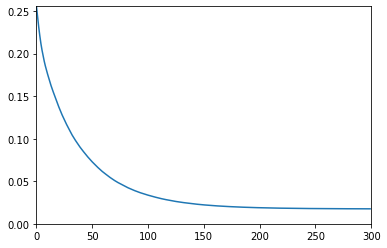

In [ ]:
"import matplotlib.pyplot as plt
%matplotlib inline
print(training_cost)
plt.plot(range(len(training_cost)),training_cost)
plt.axis([0,step,0,np.max(training_cost)])
plt.show()

In [ ]:
batch_size = 100
n_batches = int(np.ceil(2700 / batch_size))#向上取整返回
training_cost = []
i = 0
step = 500
# saver = tf.compat.v1.train.Saver()
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer()) #初始化所有参数
    # saver.save(sess,"/content/gdrive/My Drive/model.ckpt")  
    for epoch in range(1, step+1):
        for batch_index in range(n_batches):
            X_batch, y_batch, A_batch= random_batch(b[:,i], c[:], a[:,i], batch_size) 
            sess.run([loss,train,net_out], feed_dict={x: X_batch, y: y_batch, A: A_batch})


        if epoch % 10 == 0: #每十个epoch打印一次训练loss
            train_loss = sess.run(loss, feed_dict = {x: b[:,i], y: c[:], A: a[:,i]}) 
            print("Epoch", (epoch + 1), ": loss =", train_loss) 

        training_cost.append(sess.run(loss, feed_dict ={x: b[:,i], y: c[:],  A: a[:,i]})) #把所有训练loss都存起来

    test_ = sess.run(test_out, feed_dict={z:d[:,i], B: f[:,i]}) #预测测试集结果 用测试函数 
    train_ = sess.run(test_out, feed_dict={z:b[:,i], B: a[:,i]}) #预测测试集结果 用测试函数 
    test1 = sess.run(net_out, feed_dict={x:d[:,i], A: f[:,i]}) #预测测试集结果 用训练函数
    train_again1 = sess.run(net_out, feed_dict={x:b[:,i], A: a[:,i]}) #预测测试集结果 用训练函数


ValueError: ignored

In [ ]:


# pred_y = sess.run(y_, feed_dict={X: test_x})
# mse = tf.reduce_mean(tf.square(pred_y - test_y))
# print("MSE: %.4f" % sess.run(mse)) 

# fig, ax = plt.subplots()
# ax.scatter(test_y, pred_y)
# ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()